In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iterations = 100

z0 = -0.1 - 0.7j

CONST = 0

WIDTH = 2

RANGE_SIZE = 1000

1. Black and white colors of pixels are correct (1 point)


2. Different colors for bifurcation points (you can also create your own coloring logic or look for proposals on the internet) (1 point)

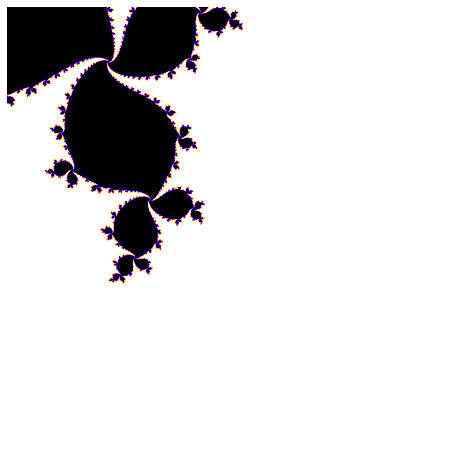

In [8]:
data = zeros((RANGE_SIZE, RANGE_SIZE))

for i in range(RANGE_SIZE):
    for j in range(RANGE_SIZE):
        
        z = complex(i / RANGE_SIZE * WIDTH, j / RANGE_SIZE * WIDTH) + CONST
        count = 0
        while abs(z) < 2 and count < iterations:
            z = z**2 + z0
            count += 1
            
        if abs(z) >= 2.:
            data[i, j] = 1.
        
fig, ax = subplots(figsize=(10, 8))

ax.imshow(data, cmap=cm.gnuplot2)

axis('off')
show()

3. Generate figure of Julia set (c = 1-r) where r is the golden ratio. Label the axes (Re(z0), Im(z0)) (2 points)

In [5]:
golden_ratio = (1 + sqrt(5)) / 2
constant = 1 - golden_ratio

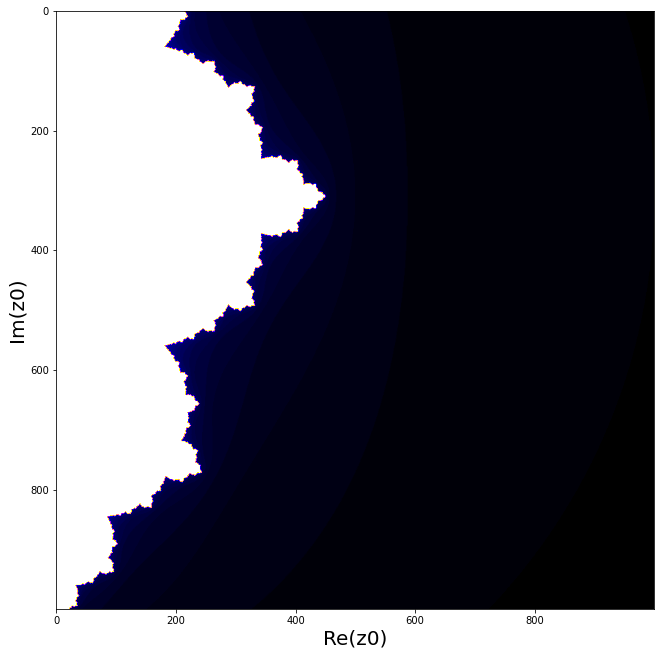

In [9]:
data = zeros((RANGE_SIZE, RANGE_SIZE))

for i in range(RANGE_SIZE):
    for j in range(RANGE_SIZE):
        
        z = complex(i / RANGE_SIZE * WIDTH, j / RANGE_SIZE * WIDTH) + constant
        count = 0
        while abs(z) < 2 and count < iterations:
            z = z**2 + constant
            count += 1
            
        data[i, j] = count / iterations
        
fig, ax = subplots(figsize=(14, 11))

ax.set_xlabel('Re(z0)', fontsize=20)
ax.set_ylabel('Im(z0)', fontsize=20)

ax.imshow(data, cmap=cm.gnuplot2)
show()

4. Plot figures for c=exp(ia), a = range(0,2pi) & write down axes like in subtask 3, create animation of these figures slowly changing the a (3 points)

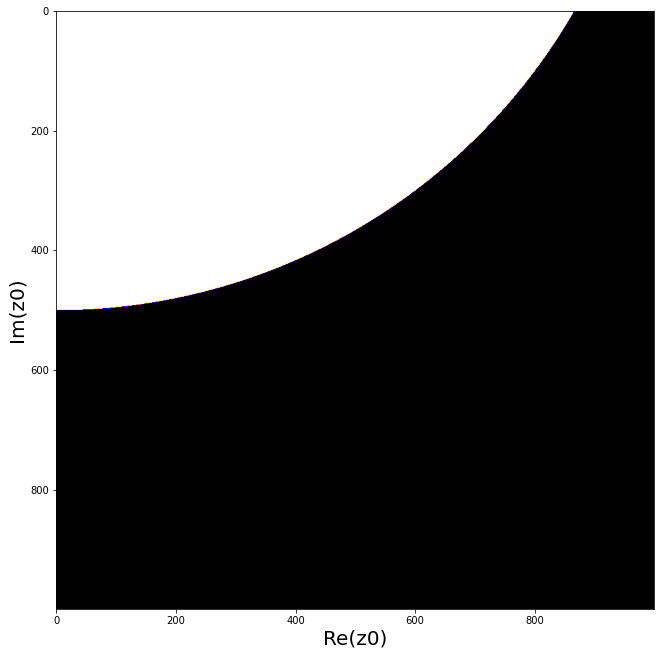

In [17]:
data = zeros((RANGE_SIZE, RANGE_SIZE))

fig, ax = subplots(figsize=(14, 11))

ax.set_xlabel('Re(z0)', fontsize=20)
ax.set_ylabel('Im(z0)', fontsize=20)

files = []
a_params = linspace(0, 2 * pi, 100)

for index, a in enumerate(a_params):
    constant = exp(1.j * a)
    
    for i in range(RANGE_SIZE):
        for j in range(RANGE_SIZE):

            z = complex(i / RANGE_SIZE * WIDTH, j / RANGE_SIZE * WIDTH) + constant
            count = 0
            while abs(z) < 2 and count < iterations:
                z = z**2 + constant
                count += 1

            data[i, j] = count / iterations

    files.append('images_for_gif_{}.png'.format(index))
    ax.imshow(data, cmap=cm.gnuplot2)
    savefig('/home/prateek/sk_courses/hppl/fractals_hw2/{}'.format(files[-1]), dpi=200)

In [2]:
# !pip install imageio
# !pip install tqdm

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [5]:
files = []
for index in range(100):
    files.append('images_for_gif_{}.png'.format(index))

In [6]:
import imageio
from IPython.display import Image, HTML
from tqdm import tqdm

In [7]:
images = []
for file in tqdm(files):
    images.append(imageio.imread('/home/prateek/sk_courses/hppl/fractals_hw2/{}'.format(file)))
imageio.mimsave('/home/prateek/sk_courses/hppl/fractals_hw2/julia_set.gif', images)

  0%|          | 0/100 [00:00<?, ?it/s]/snap/jupyter/6/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 100/100 [00:12<00:00,  8.27it/s]


In [10]:
rcParams['animation.embed_limit'] = 200

In [11]:
Image(url='/home/prateek/sk_courses/hppl/fractals_hw2/julia_set.gif')